# data 불러오기

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

style.use("fivethirtyeight")
style.use("seaborn-talk")
#plt.rcParams['font.family'] = 'serif'

import warnings

warnings.filterwarnings('ignore')

# Data: 첫 번째 확장

**첫구매를 기준으로 첫 번째 확장이 일어난 정보만을 이용해 다음 확장될 계열사를 예측해보자!**
- 구매가 한 번 이하인 사람들은 제외시킴. 
- A01&rarr;A02&rarr;A03&rarr;A02&rarr;A05가 나오면 A01&rarr;A02까지만 다루고 그 이후는 제외시킴.
- 즉, 같은 고객이 첫 번째 계열사 확장이 일어날 때까지의 데이터만을 다룸.

In [10]:
ext = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/예측 모델 데이터/extension_cust_info2.csv', index_col=0)

In [3]:
ext['clac_hlv_nm']=ext['clac_hlv_nm'].apply(lambda x: max(x[1:-1].split(', '))[1:-1])
ext['clac_mcls_nm']=ext['clac_mcls_nm'].apply(lambda x: max(x[1:-1].split(', '))[1:-1])
ext['pd_c']=ext['pd_c'].apply(lambda x: max(x[1:-1].split(', '))[1:-1])
ext['br_c']=ext['br_c'].apply(lambda x: max(x[1:-1].split(', '))[1:-1])

In [12]:
ext.columns

Index(['cust', 'first_cop', 'first_cnt', 'second_cop', 'buy_am',
       'online_prefer', 'cycle', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'A01', 'A02', 'L01', 'A03',
       'C01', 'D02', 'A04', 'D01', 'A05', 'A06', 'E01', 'B01', 'C02', 'L00',
       'cycle_days', 'avg_buy_am', 'log_avg_buy_am'],
      dtype='object')

In [11]:
ext.head()

,cust,first_cop,first_cnt,second_cop,buy_am,online_prefer,cycle,Lpay,pd_c,clac_hlv_nm,...,D01,A05,A06,E01,B01,C02,L00,cycle_days,avg_buy_am,log_avg_buy_am
0,M000034966,A01,1,A04,140200.0,0.0,1번 구매,0,"['PD0777', 'PD0777', 'PD0796', 'PD0816']","['스포츠패션', '스포츠패션', '스포츠패션', '스포츠패션']",...,0,0,0,0,0,0,0,365,140200.000000,11.850832
1,M000136117,A02,1,A06,24700.0,1.0,1번 구매,0,"['PD1164', 'PD1847', 'PD0601']","['음료', '퍼스널케어', '세제/위생']",...,0,0,0,0,0,0,0,365,24700.000000,10.114599
2,M000225114,A01,4,A03,82580.0,0.0,1 days 19:20:00,0,"['PD0232', 'PD0232', 'PD0232', 'PD1170', 'PD11...","['과자', '과자', '과자', '음료', '음료', '테넌트/음식점', '테넌트...",...,0,0,0,0,0,0,0,1,20645.000000,9.935277
3,M000261625,A01,3,D01,441700.0,0.0,20 days 22:00:00,0,"['PD1919', 'PD1922', 'PD1919', 'PD1824', 'PD18...","['화장품/뷰티케어', '화장품/뷰티케어', '화장품/뷰티케어', '패션잡화', '...",...,0,0,0,0,0,0,0,20,147233.333333,11.899781
4,M000419293,L01,2,A01,188174.0,1.0,2 days 15:00:00,1,"['L01', 'L01']","['L01', 'L01']",...,0,0,0,0,0,0,0,2,94087.000000,11.451986


## Decision Tree

### 2개의 feature

In [6]:
e0=ext[['cust', 'first_cop', 'first_cnt', 'second_cop']]

In [7]:
cop_list = list(e0.first_cop.unique())

In [8]:
for cop in cop_list:
    e0[cop] = 0

In [9]:
for i in e0.values:
    e0.loc[e0.cust == i[0], i[1]] = i[2]

In [10]:
e0.head()

,cust,first_cop,first_cnt,second_cop,A01,A02,L01,A03,C01,D02,A04,D01,A05,A06,E01,B01,C02,L00
0,M000034966,A01,1,A04,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M000136117,A02,1,A06,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,M000225114,A01,4,A03,4,0,0,0,0,0,0,0,0,0,0,0,0,0
3,M000261625,A01,3,D01,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,M000419293,L01,2,A01,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [11]:
e0.iloc[:, 4:].head()

,A01,A02,L01,A03,C01,D02,A04,D01,A05,A06,E01,B01,C02,L00
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
model = DecisionTreeClassifier(random_state=11)

# 학습과 테스트 데이터 셋으로 분리
data = e0.iloc[:,4:]
target = e0.loc[:, 'second_cop']
X_train , X_test , y_train , y_test = train_test_split(data, target, test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=11)

In [13]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'accuracy : {accuracy}')

accuracy : 0.30392156862745096


- decision tree 대신 xgboost 써보자!

## XGBoost

### 2개의 feature

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
e0['second_cop']=le.fit_transform(e0['second_cop'])

In [83]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
model = XGBClassifier(random_state=11)

# 학습과 테스트 데이터 셋으로 분리
data = e0.iloc[:, 4:]
target = e0.loc[:, 'second_cop']
X_train , X_test , y_train , y_test = train_test_split(data, target, test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
model.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=11, reg_alpha=0, ...)

In [84]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'accuracy : {accuracy}')

accuracy : 0.30310457516339867


- feature 수가 너무 적어서 성능이 낮게 나옴.
- feature를 더 추가해보자!

### 모든 feature: label encoder

In [89]:
e1=ext.copy()

In [90]:
e1.drop(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'B01', 'C01', 'C02',
       'D01', 'D02', 'E01', 'L00', 'L01'],axis=1,inplace=True)
e1.head()

,cust,first_cop,first_cnt,second_cop,buy_am,online_prefer,cycle,Lpay,pd_c,clac_hlv_nm,clac_mcls_nm,br_c,ma_fem_dv,ages,zon_hlv,cycle_days,avg_buy_am,log_avg_buy_am
0,M000034966,A01,1,A04,140200.0,0.0,1번 구매,0,PD0816,스포츠패션,여성스포츠화,A010045,여성,40대,Z07,365,140200.000000,11.850832
1,M000136117,A02,1,A06,24700.0,1.0,1번 구매,0,PD1847,퍼스널케어,여성위생용품,A0200000,여성,30대,Z11,365,24700.000000,10.114599
2,M000225114,A01,4,A03,82580.0,0.0,1 days 19:20:00,0,PD1688,테넌트/음식점,식당,A010011,여성,40대,Z17,1,20645.000000,9.935277
3,M000261625,A01,3,D01,441700.0,0.0,20 days 22:00:00,0,PD1922,화장품/뷰티케어,패션액세서리,A010017,여성,40대,Z17,20,147233.333333,11.899781
4,M000419293,L01,2,A01,188174.0,1.0,2 days 15:00:00,1,L01,L01,L01,L0100000,여성,40대,Z17,2,94087.000000,11.451986


In [91]:
e1.columns[e1.dtypes==object].tolist()

['cust',
 'first_cop',
 'second_cop',
 'cycle',
 'pd_c',
 'clac_hlv_nm',
 'clac_mcls_nm',
 'br_c',
 'ma_fem_dv',
 'ages',
 'zon_hlv']

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
e1['first_cop']=le.fit_transform(e1['first_cop'])
e1['pd_c']=le.fit_transform(e1['pd_c'])
e1['clac_hlv_nm']=le.fit_transform(e1['clac_hlv_nm'])
e1['clac_mcls_nm']=le.fit_transform(e1['clac_mcls_nm'])
e1['br_c']=le.fit_transform(e1['br_c'])
e1['ma_fem_dv']=le.fit_transform(e1['ma_fem_dv'])
e1['ages']=le.fit_transform(e1['ages'])
e1['zon_hlv']=le.fit_transform(e1['zon_hlv'])
e1['second_cop']=le.fit_transform(e1['second_cop'])

In [93]:
e1.columns[e1.dtypes==object].tolist()

['cust', 'cycle']

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# XGBClassifier 생성
model = XGBClassifier(random_state=11)

X=e1[['first_cop', 'first_cnt',
       'online_prefer', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'cycle_days', 
       'log_avg_buy_am']]
y=e1.loc[:, 'second_cop']
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.05, random_state=11)

# XGBClassifier 학습. 
model.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=11, reg_alpha=0, ...)

In [98]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'accuracy : {accuracy}')

accuracy : 0.352124183006536


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

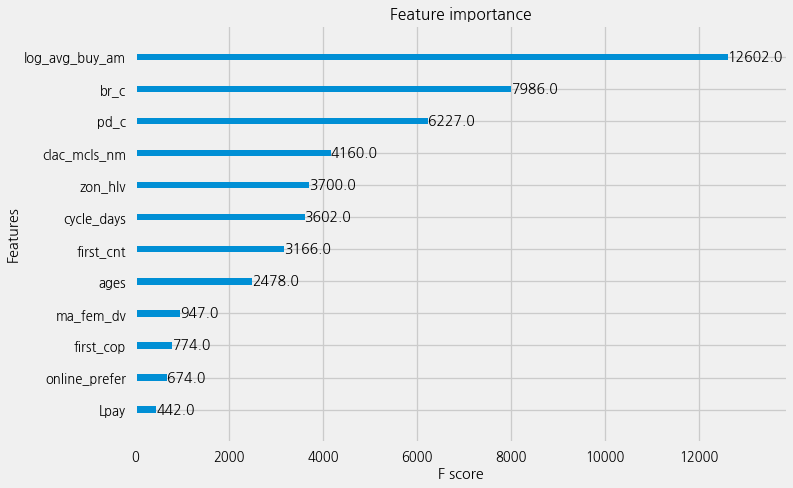

In [99]:
from xgboost import plot_importance
plot_importance(model)

In [100]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[193  37   3   3   0   5   0   5   0  21   3   0   2   1]
 [ 61 118   5   4   0  11   1   2   1  18   6   1   1   0]
 [ 35  18   6   1   0   4   0   2   0   9   2   0   0   0]
 [ 39  27   1   4   0   1   0   1   1   7   1   0   1   0]
 [  8   6   3   1   0   1   0   0   0   4   2   0   1   0]
 [ 39  26   0   1   1  60   0   1   1   8   2   0   0   1]
 [  3   2   0   0   0   0   0   1   0   2   1   0   0   0]
 [ 28  22   1   2   0   4   0   7   0   9   2   0   0   0]
 [  8   4   0   0   0   0   0   2   0   2   0   0   0   0]
 [ 73  28   6   4   0   6   0   4   0  35   4   0   0   0]
 [ 38  30   2   1   0   4   0   1   0   8   7   0   2   0]
 [  1   1   0   0   0   1   0   1   0   1   0   0   0   0]
 [  8   7   1   0   0   0   0   0   0   2   0   0   1   1]
 [  7   7   0   0   0   1   0   0   0   3   0   0   0   0]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.36      0.71      0.47       273
           1       0.35      0.52      0.42       229
           2       0.21      0.08      0.11        77
           3       0.19      0.05      0.08        83
           4       0.00      0.00      0.00        26
           5       0.61      0.43      0.50       140
           6       0.00      0.00      0.00         9
           7       0.26      0.09      0.14        75
           8       0.00      0.00      0.00        16
           9       0.27      0.22      0.24       160
          10       0.23      0.08      0.11        93
          11       0.00      0.00      0.00         5
          12       0.12      0.05      0.07        20
          13       0.00      0.00      0.00        18

    accuracy                           0.35      1224
   macro avg       0.19      0.16      0.15      1224
weighted avg       0.31      0.35      0.30      1224



### 첫제휴사&빈도수 이외 feature: label encoder

In [103]:
e2=ext.copy()

In [104]:
e2.columns[e2.dtypes==object].tolist()

['cust',
 'first_cop',
 'second_cop',
 'cycle',
 'pd_c',
 'clac_hlv_nm',
 'clac_mcls_nm',
 'br_c',
 'ma_fem_dv',
 'ages',
 'zon_hlv']

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
e2['second_cop']=le.fit_transform(e2['second_cop'])
e2['pd_c']=le.fit_transform(e2['pd_c'])
e2['clac_hlv_nm']=le.fit_transform(e2['clac_hlv_nm'])
e2['clac_mcls_nm']=le.fit_transform(e2['clac_mcls_nm'])
e2['br_c']=le.fit_transform(e2['br_c'])
e2['ma_fem_dv']=le.fit_transform(e2['ma_fem_dv'])
e2['ages']=le.fit_transform(e2['ages'])
e2['zon_hlv']=le.fit_transform(e2['zon_hlv'])

In [106]:
e2.columns[e2.dtypes==object].tolist()

['cust', 'first_cop', 'cycle']

In [107]:
e2.columns

Index(['cust', 'first_cop', 'first_cnt', 'second_cop', 'buy_am',
       'online_prefer', 'cycle', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'A01', 'A02', 'L01', 'A03',
       'C01', 'D02', 'A04', 'D01', 'A05', 'A06', 'E01', 'B01', 'C02', 'L00',
       'cycle_days', 'avg_buy_am', 'log_avg_buy_am'],
      dtype='object')

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# XGBClassifier 생성
model = XGBClassifier(random_state=11)

X=e2[['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'B01', 'C01', 'C02',
       'D01', 'D02', 'E01', 'L00', 'L01',
      'online_prefer', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'cycle_days', 
       'log_avg_buy_am']]
y=e2.loc[:, 'second_cop']
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.05, random_state=11)

# XGBClassifier 학습. 
model.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=11, reg_alpha=0, ...)

In [109]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'accuracy : {accuracy}')

accuracy : 0.36356209150326796


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

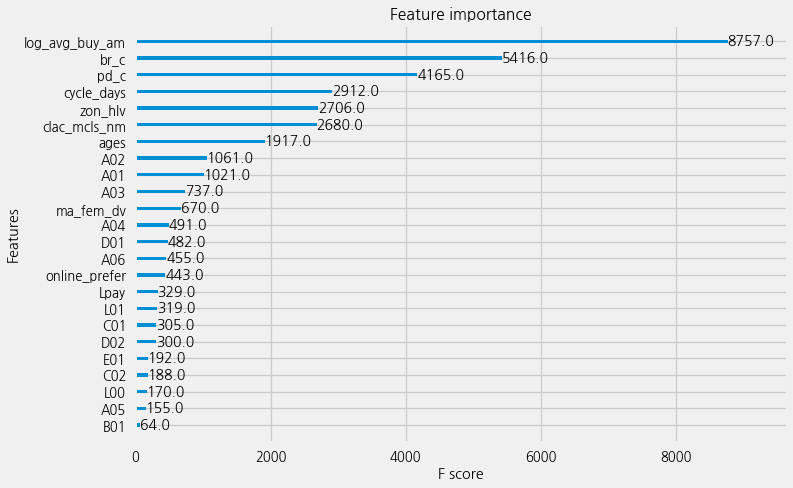

In [112]:
from xgboost import plot_importance
plot_importance(model)

In [110]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[205  32   1   1   0   4   0   3   0  23   1   0   2   1]
 [ 63 120   4   4   0   6   1   2   1  19   6   0   3   0]
 [ 38  19   3   1   0   4   0   2   0   7   3   0   0   0]
 [ 35  32   1   3   1   0   0   2   0   8   1   0   0   0]
 [  9   7   1   2   1   1   0   0   0   3   1   0   1   0]
 [ 34  27   1   0   0  66   0   2   1   7   1   0   0   1]
 [  2   2   1   0   0   0   0   1   1   1   1   0   0   0]
 [ 27  22   1   1   0   8   0   8   0   5   3   0   0   0]
 [  8   5   0   0   0   0   0   1   0   1   1   0   0   0]
 [ 72  35   2   0   0   6   0   3   0  36   5   0   1   0]
 [ 40  32   2   2   0   2   0   2   0   9   3   0   1   0]
 [  2   1   0   1   0   1   0   0   0   0   0   0   0   0]
 [  6  10   0   0   0   0   0   0   0   4   0   0   0   0]
 [  4   6   1   0   0   1   0   1   0   4   0   0   1   0]]


In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.38      0.75      0.50       273
           1       0.34      0.52      0.41       229
           2       0.17      0.04      0.06        77
           3       0.20      0.04      0.06        83
           4       0.50      0.04      0.07        26
           5       0.67      0.47      0.55       140
           6       0.00      0.00      0.00         9
           7       0.30      0.11      0.16        75
           8       0.00      0.00      0.00        16
           9       0.28      0.23      0.25       160
          10       0.12      0.03      0.05        93
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        18

    accuracy                           0.36      1224
   macro avg       0.21      0.16      0.15      1224
weighted avg       0.32      0.36      0.31      1224



In [143]:
len(ext)

24480

- 데이터 수를 더 늘려보자!

# Data: 데이터 확장

고객의 구매 데이터를 통해 다음으로 이용할 가능성이 높은 계열사를 예측하고자 한다.

**첫구매를 기준으로 첫 번째 확장뿐만 아니라 그 이후의 확장까지 고려한 정보를 이용해 다음 확장될 계열사를 예측해보자!**
- 구매가 한 번 이하인 사람들은 제외시킴. 
- A01&rarr;A02&rarr;A03&rarr;A02&rarr;A05가 나오면 A01&rarr;A02&rarr;A03까지만 다루고 그 이후는 제외시킴.
- 즉, 같은 고객에서 중복된 계열사가 추후에 나오면 그 이전까지의 데이터만을 다룸.

## XGBoost

In [13]:
extend = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/예측 모델 데이터/extension_continue_cust_info.csv', index_col=0)

In [14]:
extend['clac_hlv_nm']=extend['clac_hlv_nm'].apply(lambda x: max(x[1:-1].split(', '))[1:-1])
extend['clac_mcls_nm']=extend['clac_mcls_nm'].apply(lambda x: max(x[1:-1].split(', '))[1:-1])
extend['pd_c']=extend['pd_c'].apply(lambda x: max(x[1:-1].split(', '))[1:-1])
extend['br_c']=extend['br_c'].apply(lambda x: max(x[1:-1].split(', '))[1:-1])

In [15]:
extend.columns

Index(['cust', 'first_cop', 'first_cnt', 'second_cop', 'buy_am',
       'online_prefer', 'cycle', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'A01', 'A04', 'A02', 'L01',
       'A03', 'C01', 'A06', 'D02', 'L00', 'D01', 'A05', 'E01', 'B01', 'C02',
       'cycle_days', 'avg_buy_am', 'log_avg_buy_am'],
      dtype='object')

In [16]:
extend.head()

,cust,first_cop,first_cnt,second_cop,buy_am,online_prefer,cycle,Lpay,pd_c,clac_hlv_nm,...,D02,L00,D01,A05,E01,B01,C02,cycle_days,avg_buy_am,log_avg_buy_am
0,M000034966,A01,1,A04,140200.0,0.0,1번 구매,0,PD0816,스포츠패션,...,0,0,0,0,0,0,0,365,140200.000000,11.850832
1,M000034966,A04,1,A02,12000.0,0.0,1번 구매,0,PD1330,주류,...,0,0,0,0,0,0,0,365,12000.000000,9.392745
2,M000136117,A02,1,A06,24700.0,1.0,1번 구매,0,PD1847,퍼스널케어,...,0,0,0,0,0,0,0,365,24700.000000,10.114599
3,M000225114,A01,4,A03,82580.0,0.0,1 days 19:20:00,0,PD1688,테넌트/음식점,...,0,0,0,0,0,0,0,1,20645.000000,9.935277
4,M000261625,A01,3,D01,441700.0,0.0,20 days 22:00:00,0,PD1922,화장품/뷰티케어,...,0,0,0,0,0,0,0,20,147233.333333,11.899781


In [18]:
cop_list = list(extend.first_cop.unique())

### Custom & Label encoding

In [23]:
e3=extend.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
e3['first_cop']=le.fit_transform(e3['first_cop'])
e3['second_cop']=le.fit_transform(e3['second_cop'])
e3['pd_c']=le.fit_transform(e3['pd_c'])
e3['clac_hlv_nm']=le.fit_transform(e3['clac_hlv_nm'])
e3['clac_mcls_nm']=le.fit_transform(e3['clac_mcls_nm'])
e3['br_c']=le.fit_transform(e3['br_c'])
e3['ma_fem_dv']=le.fit_transform(e3['ma_fem_dv'])
e3['ages']=le.fit_transform(e3['ages'])
e3['zon_hlv']=le.fit_transform(e3['zon_hlv'])

In [25]:
e3.columns[e3.dtypes==object].tolist()

['cust', 'cycle']

In [26]:
e3.columns

Index(['cust', 'first_cop', 'first_cnt', 'second_cop', 'buy_am',
       'online_prefer', 'cycle', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'A01', 'A04', 'A02', 'L01',
       'A03', 'C01', 'A06', 'D02', 'L00', 'D01', 'A05', 'E01', 'B01', 'C02',
       'cycle_days', 'avg_buy_am', 'log_avg_buy_am'],
      dtype='object')

In [27]:
#e3.to_csv('최종_extension_continue_cust_info_전처리.csv')

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# XGBClassifier 생성
model = XGBClassifier(random_state=11)

X=e3[['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'B01', 'C01', 'C02',
       'D01', 'D02', 'E01', 'L00', 'L01',
      'online_prefer', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'cycle_days', 
       'log_avg_buy_am']]
y=e3.loc[:, 'second_cop']
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.05, random_state=11)

# XGBClassifier 학습. 
model.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=11, reg_alpha=0, ...)

In [29]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'accuracy : {accuracy}')

accuracy : 0.3904295812941816


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

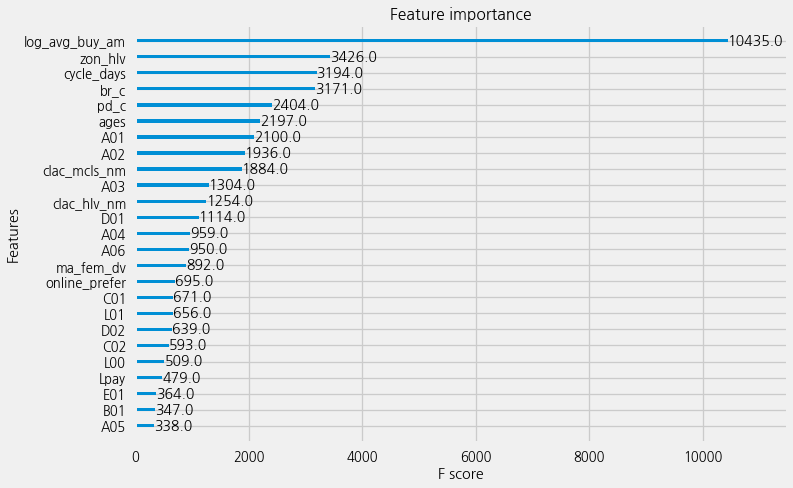

In [30]:
from xgboost import plot_importance
plot_importance(model)

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[223  45  11  16   5  14   1  11   6  24  12   0   7   2]
 [ 65 178  12   5   4  10   3   3   1  21   9   1   6   3]
 [ 33  31  27   4   1   4   1   7   0   7   5   0   2   4]
 [ 36  27   3  34   0   5   0   4   0  11   4   0   1   2]
 [ 11  14   0   1   4   1   2   2   0   1   3   0   0   0]
 [ 29  27   2   8   0 100   0   3   1  16   4   0   2   1]
 [  4   3   1   0   0   2   3   0   1   1   1   0   0   0]
 [ 28  23   4   3   0   5   0  26   3   9   4   0   0   0]
 [ 12  11   0   1   0   4   1   4  13   7   5   0   0   0]
 [ 79  39   9   6   1  13   2   9   3  63   9   1   5   3]
 [ 37  39   6   5   2   4   2   4   0  10  33   1   3   0]
 [  2   5   0   2   0   0   0   0   0   1   2   0   0   1]
 [ 12   8   1   0   0   2   0   1   0   4   0   0   6   2]
 [  8   7   1   1   0   4   0   0   1   7   2   0   1   8]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.39      0.59      0.47       377
           1       0.39      0.55      0.46       321
           2       0.35      0.21      0.27       126
           3       0.40      0.27      0.32       127
           4       0.24      0.10      0.14        39
           5       0.60      0.52      0.55       193
           6       0.20      0.19      0.19        16
           7       0.35      0.25      0.29       105
           8       0.45      0.22      0.30        58
           9       0.35      0.26      0.30       242
          10       0.35      0.23      0.28       146
          11       0.00      0.00      0.00        13
          12       0.18      0.17      0.17        36
          13       0.31      0.20      0.24        40

    accuracy                           0.39      1839
   macro avg       0.32      0.27      0.28      1839
weighted avg       0.39      0.39      0.37      1839



### 불균형 class 분류

Text(0.5, 1.0, 'second_cop')

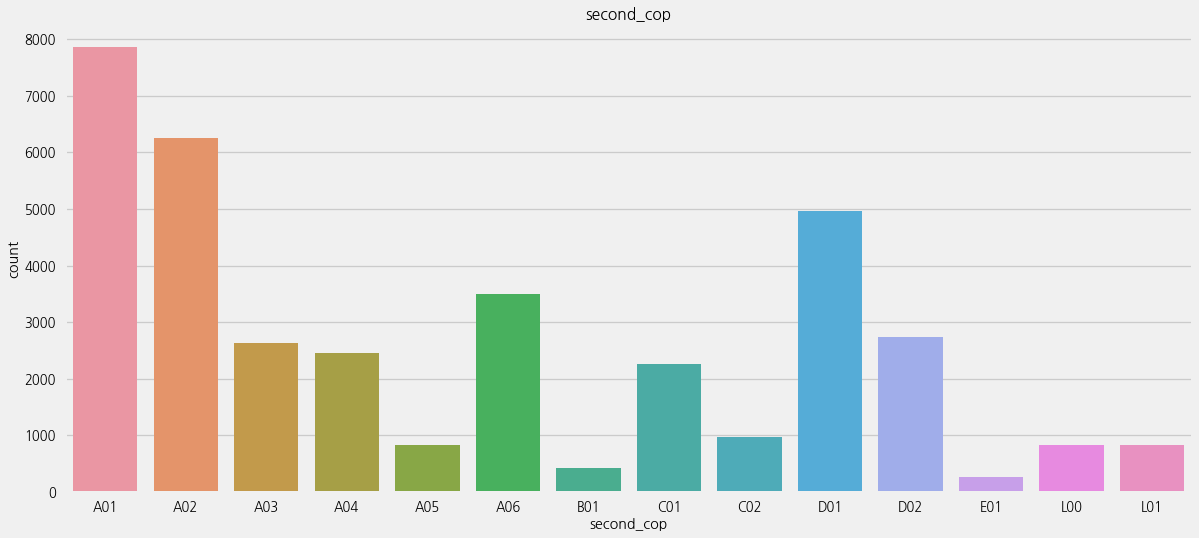

In [41]:
CopLabels=['A01', 'A02', 'A03','A04', 'A05', 'A06', 'B01','C01', 'C02','D01', 'D02', 'E01', 'L00','L01']
f, ax = plt.subplots(figsize=(18, 8))
sns.countplot(x="second_cop", data=extend,order=CopLabels)
ax.set_title('second_cop')

- 각 class가 가지고 있는 data의 양의 차이가 크다.
- 즉, 불균형 클래스 분류임을 알 수 있다.
- SMOTE와 sample_weights를 이용해 불균형 데이터 문제를 해결하고자 한다.

#### SMOTE

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# XGBClassifier 생성
model = XGBClassifier(random_state=11)

X=e3[[ 'A01', 'A02', 'L01', 'A03',
       'C01', 'D02', 'A04', 'D01', 'A05', 'A06', 'E01', 'B01', 'C02', 'L00',
      'online_prefer', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'cycle_days', 
       'log_avg_buy_am']]
y=e3.loc[:, 'second_cop']
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.05, stratify=y, random_state=11)

In [43]:
train=pd.concat([X_train,y_train],axis=1)
test=pd.concat([X_test,y_test],axis=1)

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=11)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (34928, 25) (34928,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (104510, 25) (104510,)
SMOTE 적용 후 값의 분포 :
 0     7465
1     7465
2     7465
3     7465
4     7465
5     7465
6     7465
7     7465
8     7465
9     7465
10    7465
11    7465
12    7465
13    7465
Name: second_cop, dtype: int64


In [45]:
# XGBClassifier 학습. 
model.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=11, reg_alpha=0, ...)

In [46]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'accuracy : {accuracy}')

accuracy : 0.32463295269168024


In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[159  48  24  14  10  24   8  19  15  34   6  10  12  10]
 [ 38 125  12   9  12  17   2  20  13  15  16   3  14  17]
 [ 22  21  32   4   7   6   0   7   3  11   8   3   3   4]
 [ 18  14   6  27   8   8   5   6   7   8   7   0   2   7]
 [  8   3   2   1  12   7   1   1   0   3   3   0   0   0]
 [ 24  16   2   3   3  92   4   3   1  11   6   1   5   4]
 [  4   3   1   1   0   2   4   0   2   2   1   0   0   1]
 [ 16  15   5   8   3   9   4  21   8   6   5   4   5   4]
 [  4   3   2   3   3   1   0   3  18   4   4   2   1   1]
 [ 46  24  16  12   7  18   7  13  15  48  15   3  12  12]
 [ 23  15  11   3   4   6   3   6   7  13  34   1   1  10]
 [  4   0   0   1   1   0   1   1   1   2   1   0   0   1]
 [  5   5   3   3   0   4   0   2   0   2   1   0  11   5]
 [  5   4   2   1   2   2   0   1   1   5   1   0   3  14]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.42      0.40      0.41       393
           1       0.42      0.40      0.41       313
           2       0.27      0.24      0.26       131
           3       0.30      0.22      0.25       123
           4       0.17      0.29      0.21        41
           5       0.47      0.53      0.50       175
           6       0.10      0.19      0.13        21
           7       0.20      0.19      0.19       113
           8       0.20      0.37      0.26        49
           9       0.29      0.19      0.23       248
          10       0.31      0.25      0.28       137
          11       0.00      0.00      0.00        13
          12       0.16      0.27      0.20        41
          13       0.16      0.34      0.21        41

    accuracy                           0.32      1839
   macro avg       0.25      0.28      0.25      1839
weighted avg       0.34      0.32      0.33      1839



#### sample_weights

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# XGBClassifier 생성
model = XGBClassifier(random_state=11)

X=e3[[ 'A01', 'A02', 'L01', 'A03',
       'C01', 'D02', 'A04', 'D01', 'A05', 'A06', 'E01', 'B01', 'C02', 'L00',
      'online_prefer', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'cycle_days', 
       'log_avg_buy_am']]
y=e3.loc[:, 'second_cop']
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.05, stratify=y, random_state=11)

In [54]:
sample_weights = compute_sample_weight(

    class_weight='balanced',

    y=y_train #provide your own target name

)

In [55]:
sample_weights

array([1.06983582, 0.33420725, 3.16606236, ..., 0.52913195, 0.41951524,
       1.00034368])

In [56]:
# XGBClassifier 학습. 
model.fit(X_train , y_train, sample_weight=sample_weights)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=11, reg_alpha=0, ...)

In [57]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'accuracy : {accuracy}')

accuracy : 0.33278955954323003


## hyperparameter tunning

- XGBoost에서 하이퍼파라미터 튜닝은 매우 중요하다.
- WandB(Weights & Biases)를 이용해 xgboost hyperparameter tunning을 하고자 한다.
- Colab이용

In [32]:
import pandas as pd

ext_df = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/예측 모델 데이터/extension.csv', index_col=0)
ext_df

,cust,first_cop,first_cnt,second_cop,buy_am,online_prefer,cycle,Lpay,pd_c,clac_hlv_nm,...,D02,L00,D01,A05,E01,B01,C02,cycle_days,avg_buy_am,log_avg_buy_am
0,M000034966,A01,1,3,140200.0,0.0,1번 구매,0,9,23,...,0,0,0,0,0,0,0,365,140200.000000,11.850832
1,M000034966,A04,1,1,12000.0,0.0,1번 구매,0,14,0,...,0,0,0,0,0,0,0,365,12000.000000,9.392745
2,M000136117,A02,1,5,24700.0,1.0,1번 구매,0,19,17,...,0,0,0,0,0,0,0,365,24700.000000,10.114599
3,M000225114,A01,4,2,82580.0,0.0,1 days 19:20:00,0,17,24,...,0,0,0,0,0,0,0,1,20645.000000,9.935277
4,M000261625,A01,3,9,441700.0,0.0,20 days 22:00:00,0,20,25,...,0,0,0,0,0,0,0,20,147233.333333,11.899781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36762,M999849895,A01,2,9,80950.0,0.0,0 days 01:00:00,0,3,1,...,0,0,0,0,0,0,0,0,40475.000000,10.608464
36763,M999926092,D02,1,9,29100.0,0.0,1번 구매,0,0,0,...,1,0,0,0,0,0,0,365,29100.000000,10.278528
36764,M999962961,A01,1,1,39000.0,0.0,1번 구매,0,10,0,...,0,0,0,0,0,0,0,365,39000.000000,10.571343
36765,M999962961,A02,1,2,54680.0,0.0,1번 구매,0,15,0,...,0,0,0,0,0,0,0,365,54680.000000,10.909272


In [34]:
X=ext_df[[ 'A01', 'A02', 'L01', 'A03',
       'C01', 'D02', 'A04', 'D01', 'A05', 'A06', 'E01', 'B01', 'C02', 'L00',
      'online_prefer', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'cycle_days', 
       'log_avg_buy_am']]
Y=ext_df.loc[:, 'second_cop']

In [35]:
X

,A01,A02,L01,A03,C01,D02,A04,D01,A05,A06,...,Lpay,pd_c,clac_hlv_nm,clac_mcls_nm,br_c,ma_fem_dv,ages,zon_hlv,cycle_days,log_avg_buy_am
0,1,0,0,0,0,0,1,0,0,0,...,0,9,23,59,1,1,2,6,365,11.850832
1,1,0,0,0,0,0,1,0,0,0,...,0,14,0,0,66,1,2,6,365,9.392745
2,0,1,0,0,0,0,0,0,0,0,...,0,19,17,71,17,1,1,10,365,10.114599
3,4,0,0,0,0,0,0,0,0,0,...,0,17,24,0,1,1,2,16,1,9.935277
4,3,0,0,0,0,0,0,0,0,0,...,0,20,25,64,1,1,2,16,20,11.899781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36762,2,0,0,0,0,0,0,0,0,0,...,0,3,1,0,1,1,0,3,0,10.608464
36763,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,21,0,1,7,365,10.278528
36764,1,1,0,1,0,0,0,0,0,0,...,0,10,0,74,1,1,3,16,365,10.571343
36765,1,1,0,1,0,0,0,0,0,0,...,0,15,0,0,16,1,3,16,365,10.909272


In [36]:
Y

0        3
1        1
2        5
3        2
4        9
        ..
36762    9
36763    9
36764    1
36765    2
36766    5
Name: second_cop, Length: 36767, dtype: int64

In [37]:
ext_df.columns

Index(['cust', 'first_cop', 'first_cnt', 'second_cop', 'buy_am',
       'online_prefer', 'cycle', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'A01', 'A04', 'A02', 'L01',
       'A03', 'C01', 'A06', 'D02', 'L00', 'D01', 'A05', 'E01', 'B01', 'C02',
       'cycle_days', 'avg_buy_am', 'log_avg_buy_am'],
      dtype='object')

In [38]:
!pip install wandb -qqq
import wandb
wandb.login()

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 157 kB 61.6 MB/s 
     |████████████████████████████████| 181 kB 72.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 157 kB 70.0 MB/s 
     |████████████████████████████████| 157 kB 77.2 MB/s 
     |████████████████████████████████| 157 kB 78.7 MB/s 
     |████████████████████████████████| 156 kB 60.6 MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
sweep_config = {
    "method": "random", # try grid or random
    "metric": {
      "name": "accuracy",
      "goal": "maximize"   
    },
    "parameters": {
        "objective": {
            "values": ['multi:softmax']
        },
        "n_estimators": {
            "values": [100,200,400]
        },
        "max_depth": {
            "values": [6,8,10,12,14],
        },
        "learning_rate": {
            "values": [0.01]
        },
        "subsample": {
            "values": [1],
        },
        "gamma": {
            "values": [0, 1, 2]
        },
        "reg_lambda":{
            "values": [0, 1, 2, 3]
        },
        "reg_alpha":{
            "values": [0, 1, 2]
        },
        "min_child_weight":{
            "values": [1]
        },
        "colsample_bytree":{
            "values": [1]
        },
        "colsample_bylevel":{
            "values": [0.8]
        },
        "random_state":{
            "values": [11]
        }
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="naian", project="lotto")

Create sweep with ID: cmsnlhru
Sweep URL: https://wandb.ai/naian/lotto/sweeps/cmsnlhru


In [ ]:
# XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
def train():
  config_defaults = {
    "booster": "gbtree",
    "max_depth": 3,
    "learning_rate": 0.1,
    "subsample": 1,
    "seed": 34,
    "test_size": 0.05,
  }

  wandb.init(project="lotto", entity="naian", config=config_defaults)  # defaults are over-ridden during the sweep
  config = wandb.config

  # load data and split into predictors and targets
  #dataset = loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
  #X, Y = dataset[:, :8], dataset[:, 8]

  # split data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                      test_size=config.test_size,
                                                      random_state=config.seed)

  # fit model on train
  model = XGBClassifier(tree_method='gpu_hist',
                        booster=config.booster,
                        max_depth=config.max_depth,
                        learning_rate=config.learning_rate,
                        subsample=config.subsample,
                        colsample_bylevel=config.colsample_bylevel,
                        colsample_bytree=config.colsample_bytree,
                        gamma=config.gamma,
                        reg_lambda=config.reg_lambda,
                        reg_alpha=config.reg_alpha,
                        min_child_weight=config.min_child_weight,
                        n_estimators=config.n_estimators,
                        objective=config.objective,
                        random_state=config.random_state)
  model.fit(X_train, y_train)

  # make predictions on test
  y_pred = model.predict(X_test)
  predictions = [round(value) for value in y_pred]

  # evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  print(f"Accuracy: {int(accuracy * 100.)}%")
  wandb.log({"accuracy": accuracy})

In [ ]:
wandb.agent(sweep_id, train, count=200)

## XGboost 최종모델

In [20]:
import pickle

# easy_sweep-dlrj
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                      test_size=0.05, stratify=Y,shuffle=True,
                                                      random_state=34)

model = XGBClassifier(tree_method='gpu_hist',
                        booster='gbtree',
                        max_depth=12,
                        learning_rate=0.01,
                        subsample=1,
                        colsample_bylevel=0.8,
                        colsample_bytree=1,
                        gamma=0,
                        reg_lambda=3,
                        reg_alpha=0,
                        min_child_weight=1,
                        n_estimators=200,
                        objective='multi:softmax',
                        random_state=11)

model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

#파일명
filename='xgb_model2.pickle'

#모델 저장
pickle.dump(model, open(filename, 'wb'))

Accuracy: 0.41163675910821096


# Catboost

## Import

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [2]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.8 MB/s 


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

## Data Load

In [92]:
ext2 = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/예측 모델 데이터/extension.csv', index_col=0)
ext2

,cust,first_cop,first_cnt,second_cop,buy_am,online_prefer,cycle,Lpay,pd_c,clac_hlv_nm,...,D02,L00,D01,A05,E01,B01,C02,cycle_days,avg_buy_am,log_avg_buy_am
0,M000034966,A01,1,3,140200.0,0.0,1번 구매,0,9,23,...,0,0,0,0,0,0,0,365,140200.000000,11.850832
1,M000034966,A04,1,1,12000.0,0.0,1번 구매,0,14,0,...,0,0,0,0,0,0,0,365,12000.000000,9.392745
2,M000136117,A02,1,5,24700.0,1.0,1번 구매,0,19,17,...,0,0,0,0,0,0,0,365,24700.000000,10.114599
3,M000225114,A01,4,2,82580.0,0.0,1 days 19:20:00,0,17,24,...,0,0,0,0,0,0,0,1,20645.000000,9.935277
4,M000261625,A01,3,9,441700.0,0.0,20 days 22:00:00,0,20,25,...,0,0,0,0,0,0,0,20,147233.333333,11.899781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36762,M999849895,A01,2,9,80950.0,0.0,0 days 01:00:00,0,3,1,...,0,0,0,0,0,0,0,0,40475.000000,10.608464
36763,M999926092,D02,1,9,29100.0,0.0,1번 구매,0,0,0,...,1,0,0,0,0,0,0,365,29100.000000,10.278528
36764,M999962961,A01,1,1,39000.0,0.0,1번 구매,0,10,0,...,0,0,0,0,0,0,0,365,39000.000000,10.571343
36765,M999962961,A02,1,2,54680.0,0.0,1번 구매,0,15,0,...,0,0,0,0,0,0,0,365,54680.000000,10.909272


In [93]:
ext2.columns

Index(['cust', 'first_cop', 'first_cnt', 'second_cop', 'buy_am',
       'online_prefer', 'cycle', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'A01', 'A04', 'A02', 'L01',
       'A03', 'C01', 'A06', 'D02', 'L00', 'D01', 'A05', 'E01', 'B01', 'C02',
       'cycle_days', 'avg_buy_am', 'log_avg_buy_am'],
      dtype='object')

In [95]:
data=ext2[[ 'A01', 'A02', 'L01', 'A03',
       'C01', 'D02', 'A04', 'D01', 'A05', 'A06', 'E01', 'B01', 'C02', 'L00',
      'online_prefer', 'Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm',
       'br_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'cycle_days', 
       'log_avg_buy_am']]
target=ext2.loc[:, 'second_cop']

In [123]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(data, target, test_size=0.05, stratify=target, shuffle=True, random_state=34)

In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34928 entries, 22656 to 3175
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   A01             34928 non-null  int64  
 1   A02             34928 non-null  int64  
 2   L01             34928 non-null  int64  
 3   A03             34928 non-null  int64  
 4   C01             34928 non-null  int64  
 5   D02             34928 non-null  int64  
 6   A04             34928 non-null  int64  
 7   D01             34928 non-null  int64  
 8   A05             34928 non-null  int64  
 9   A06             34928 non-null  int64  
 10  E01             34928 non-null  int64  
 11  B01             34928 non-null  int64  
 12  C02             34928 non-null  int64  
 13  L00             34928 non-null  int64  
 14  online_prefer   34928 non-null  float64
 15  Lpay            34928 non-null  int64  
 16  pd_c            34928 non-null  int64  
 17  clac_hlv_nm     34928 non-nu

In [99]:
X_test

,A01,A02,L01,A03,C01,D02,A04,D01,A05,A06,...,Lpay,pd_c,clac_hlv_nm,clac_mcls_nm,br_c,ma_fem_dv,ages,zon_hlv,cycle_days,log_avg_buy_am
11786,1,1,0,0,0,0,0,1,0,0,...,0,19,15,0,1,0,2,9,365,10.981914
16810,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,9,1,2,9,365,8.716208
23921,0,1,0,0,0,2,0,1,0,0,...,0,0,0,0,16,1,1,16,0,9.071193
5078,2,0,0,1,0,0,0,0,0,0,...,0,15,0,0,28,1,3,16,365,10.027518
13287,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,8,365,8.497195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,1,0,0,0,0,0,0,0,0,0,...,0,3,0,0,1,1,1,9,365,10.165890
11319,1,0,0,0,0,0,0,0,0,1,...,0,12,19,74,1,1,2,16,365,11.259336
11678,0,3,0,0,0,0,0,0,0,0,...,0,16,0,21,16,1,2,8,6,11.108025
18457,3,1,0,0,0,0,0,1,0,0,...,0,17,24,0,1,1,2,9,0,11.706580


In [100]:
X.columns

Index(['A01', 'A02', 'L01', 'A03', 'C01', 'D02', 'A04', 'D01', 'A05', 'A06',
       'E01', 'B01', 'C02', 'L00', 'online_prefer', 'Lpay', 'pd_c',
       'clac_hlv_nm', 'clac_mcls_nm', 'br_c', 'ma_fem_dv', 'ages', 'zon_hlv',
       'cycle_days', 'log_avg_buy_am'],
      dtype='object')

## Catboost 최종 모델
- hyperparamter : default
- accuracy : 0.42

In [101]:
n_est = 2000
seed = 42
n_fold = 8
n_class = 14

In [102]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier, Pool
skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
        folds.append((train_idx, valid_idx))

cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))
cat_cols = ['Lpay', 'pd_c', 'clac_hlv_nm', 'clac_mcls_nm', 'br_c', 'ma_fem_dv', 'ages', 'zon_hlv']
for fold in range(n_fold):
    print(f'\n----------------- Fold {fold} -----------------\n')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]
    train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
    valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

    model_cat = CatBoostClassifier(task_type="GPU", random_seed=seed)
    model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)

    cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
    cat_pred_test += model_cat.predict_proba(X_test) / n_fold

    print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')

    print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')


----------------- Fold 0 -----------------

Learning rate set to 0.148537
0:	learn: 2.4814542	test: 2.4889044	best: 2.4889044 (0)	total: 20.9ms	remaining: 20.9s
100:	learn: 1.7076239	test: 1.8221519	best: 1.8221519 (100)	total: 1.93s	remaining: 17.1s
200:	learn: 1.6404565	test: 1.8144487	best: 1.8136173 (184)	total: 3.75s	remaining: 14.9s
300:	learn: 1.5891194	test: 1.8127139	best: 1.8126147 (282)	total: 5.58s	remaining: 13s
bestTest = 1.812614745
bestIteration = 282
Shrink model to first 283 iterations.
CV Log Loss Score: 1.812615
	Log Loss: 2.535752

----------------- Fold 1 -----------------

Learning rate set to 0.148537
0:	learn: 2.4856634	test: 2.4875852	best: 2.4875852 (0)	total: 23.7ms	remaining: 23.7s
100:	learn: 1.7157358	test: 1.8269316	best: 1.8269316 (100)	total: 1.91s	remaining: 17s
200:	learn: 1.6428761	test: 1.8175554	best: 1.8173160 (171)	total: 3.75s	remaining: 14.9s
bestTest = 1.817316046
bestIteration = 171
Shrink model to first 172 iterations.
CV Log Loss Score: 1

In [103]:
# 8이 최대
from sklearn.metrics import accuracy_score

y_pred = np.argmax(cat_pred_test, axis=1)
y_true = y_test.values
accuracy_score(y_true, y_pred)

0.42088091353996737

In [94]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)  
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

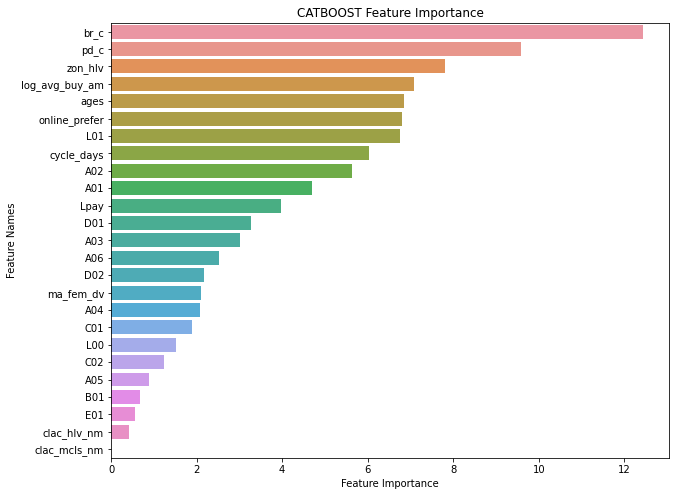

In [ ]:
plot_feature_importance(model_cat.get_feature_importance(),X_test.columns,'CATBOOST')

# Ensemble

In [20]:
import pickle
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = pickle.load(open('../3. LOTTO_데이터 및 모델 세이브 파일/모델 세이브 파일/xgb_model.pickle', 'rb'))
cat_model = pickle.load(open('../3. LOTTO_데이터 및 모델 세이브 파일/모델 세이브 파일/cat_model.pickle', 'rb'))


In [26]:
xgb_pred_test = xgb_model.predict_proba(X_test)
cat_pred_test = cat_model.predict_proba(X_test)
pred_test = (xgb_pred_test + cat_pred_test)/2

y_pred = np.argmax(pred_test, axis=1)
y_true = y_test.values
accuracy_score(y_true, y_pred)

0.4187058183795541